<a href="https://colab.research.google.com/github/lzeng11bc/DNNWithTensorflow/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 5 Support Vector Machines

## Linear SVM Classification


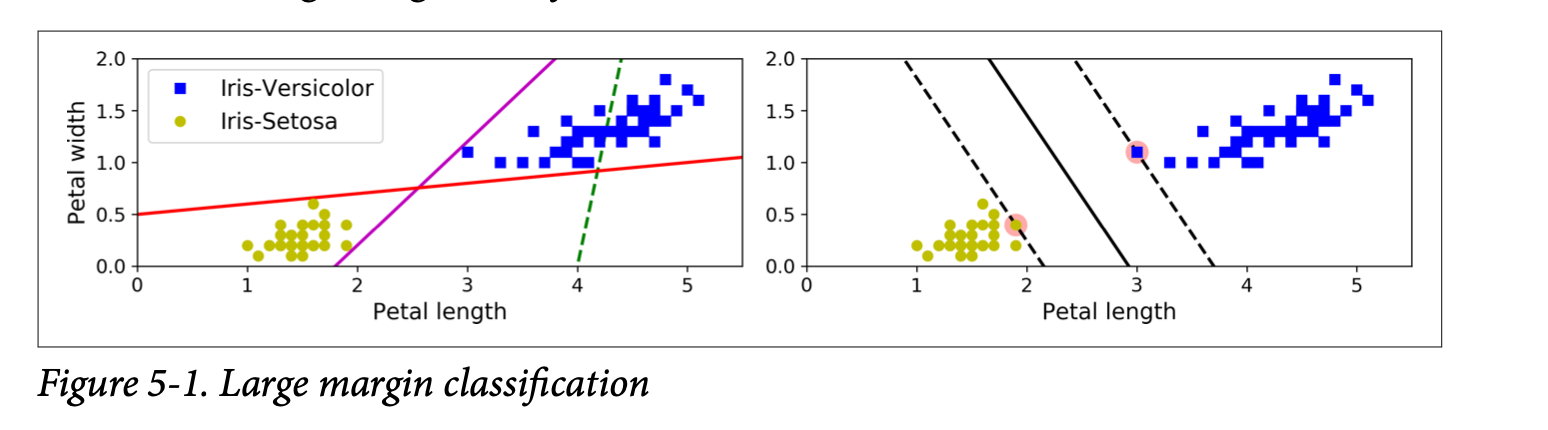

##### Large Margin Classification
* **SVM classifier is fitting the widest possible boundary between(represented by the parallell dashed lines) between the classes.**
* **Adding more training instances "off the street" will not affec the decision boundary at all: it is fully determined(or "supported") by the instances located on the edge of the street.**
    * **These instances are called the *support vectors***
* **SVMs are are sensitive to the feature scales**

### Soft Margin Classification
##### Hard Margin Classification
* **If we strictly impose that all instances be off the street, this called *hard margin classification***
***Two main issues with hard margin classification***<br>
* **It only works if the data is linearly sepearbale**
* **It is quiet sensitive to outliers**

##### Soft Margin Classification
* **The objective is to find a good balance between keeping the street as large as possible and limiting the *margin violations***

##### C Hyperparameter
* **A smaller C value leads to a wider street but more margin violations.**

**Loads the iris dataset, scales the features, and then trains a linear SVM model.**

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.pipebline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [5]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris - Virginica

svm_clf = Pipeline([
                    ("scaler", StandardScaler()),
                    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [7]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

* **Alternatively, you could use the SVC class, using the SVC(kernel="linear", C=1), but it is much slower, especially with large traning sets, so it is not recommened**
* **Anotehr option is to use the SGDClassifier class, with SGDClassifier(loss="hinge", alpha=1/(m\*C))**
    * **This applies regular Stochastic Gradient Descent to trai a linear SVM classifier.**
    * **It is useful to hangle huge datasets**

## Nonlinear SVM Classification
* **One approach to handling nonlinear datasets is to add more features, such as polynomial features.**
* **To implement this idea in Scikit-Learn, you can create a Pipelne contaiing PolynomialFeatures transformer, followed by a StandardScaler and a LinearSVC.**
* **Let's test this on the moons dataset: this is a toy dataset for binary calssification in which the datapoints are shaped as two inerleaving half circles.**

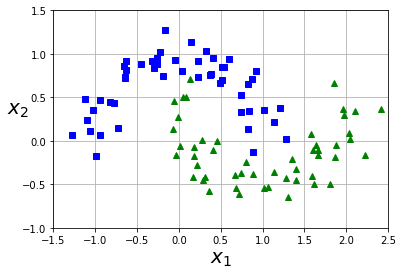

In [9]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

### Polynomial Kernel
* **If your model is overfitting, you might want to reduce the polynomial degree.**
* **If it is underfitting, yu can try increasing it**

In [11]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
                               ("poly_features", PolynomialFeatures(degree=3)),
                               ("scaler", StandardScaler()),
                               ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

In [12]:
polynomial_svm_clf.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

### Adding Similarity Features
* **Another technique to tackle nonlinear problem is to add features computed using a *similarity function* that measures how much each instance resembels a particular *landmark***

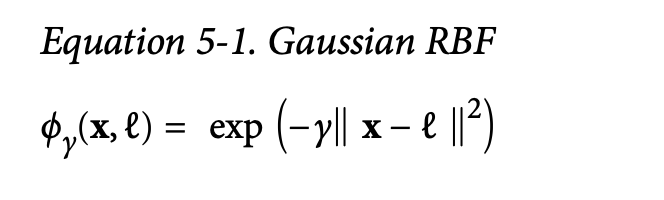

* **It is a bell-shaped function varying from 0 to 1.**
* **You may wonder how to select the landmarks.**
    * **The simplest approach is to create a landmark at the location of each and every instance in the datasets.**
    * **This creates many dimensions and thus increases the chances that the trnasformed training set will be linearly separable.**
    * **The downside is that a training set with *m* instances and *n* features gets transformed into a training set with *m* instances and *m* features.**
    * **If you training set is very large, you end up with an equally large number of features.**

### Gaussian RBF Kernel
* **The kernel trick makes it possible to obtain a similar result as if you had added many similariy features, without actually gaving to add them**

In [14]:
from sklearn.svm import SVC

rbf_kernel_svm_clf = Pipeline([
                               ("scaler", StandardScaler()),
                               ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

In [15]:
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

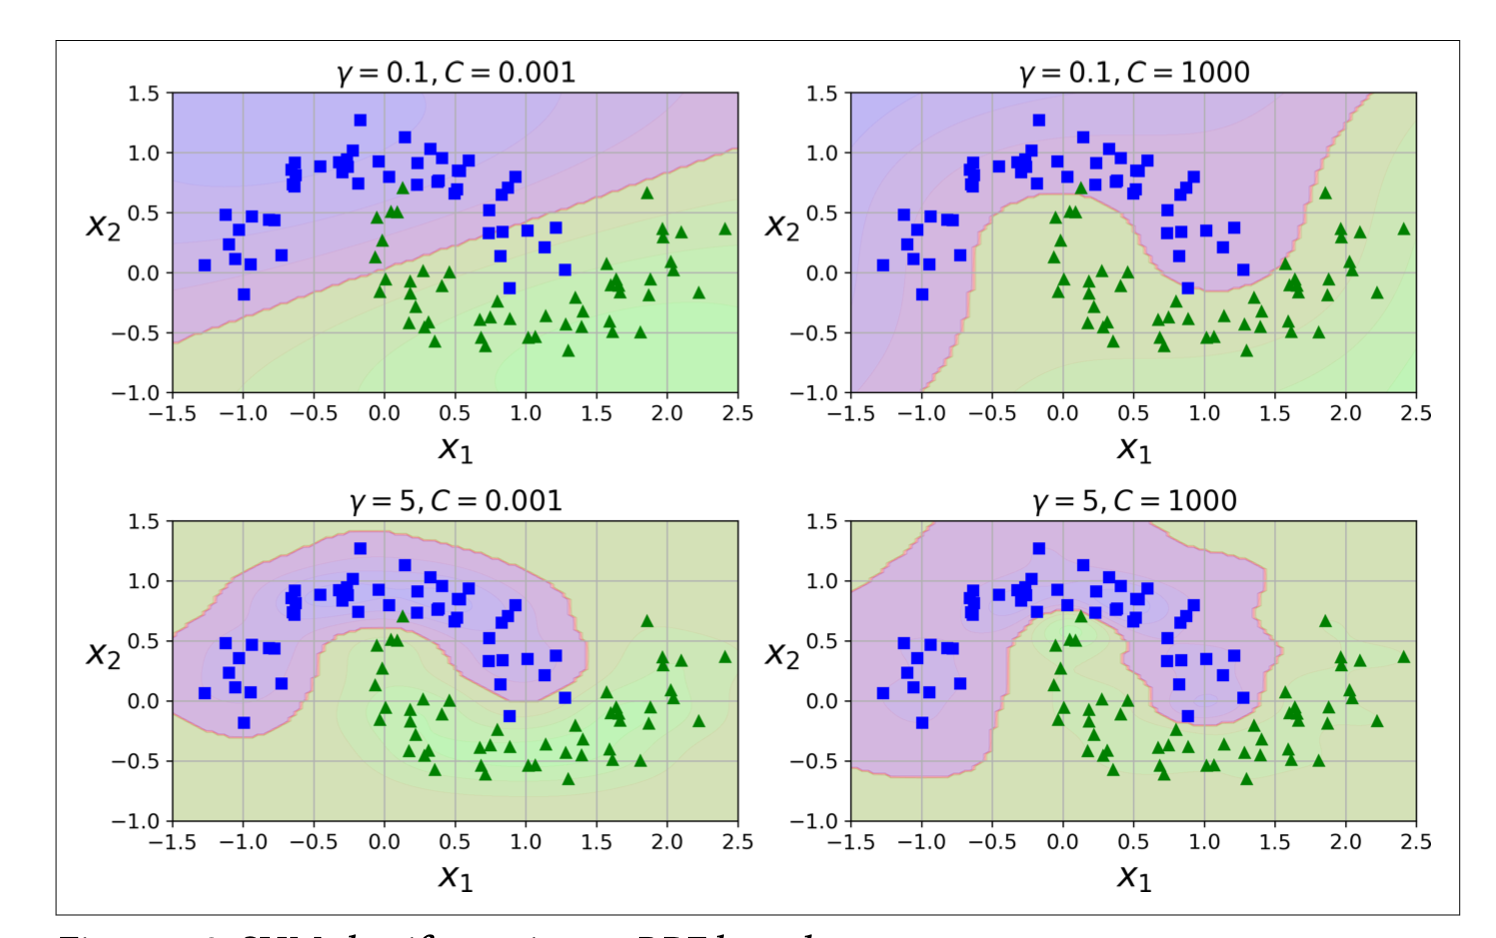

* **Incresing $\gamma$ makes the bell-shape curve narrower, and as a result each instance's range of influence is smaller: the decision boundary ends up being more irregular, wiggling around individual instances**
    * **As a result, $\gamma$ acts as a regularization hyperparameter: if your model is overfitting, you sould reduce it, and if it is underfitting, you should increase it.**

##### Choosing the Right Kernels
* **You should always try the linear kernel first, especially if the training set is very large or if it has plenty of features.**
* **If the training set is not too large, you should try the Gaussian RBF kernel as well**

### Computation Complexity 


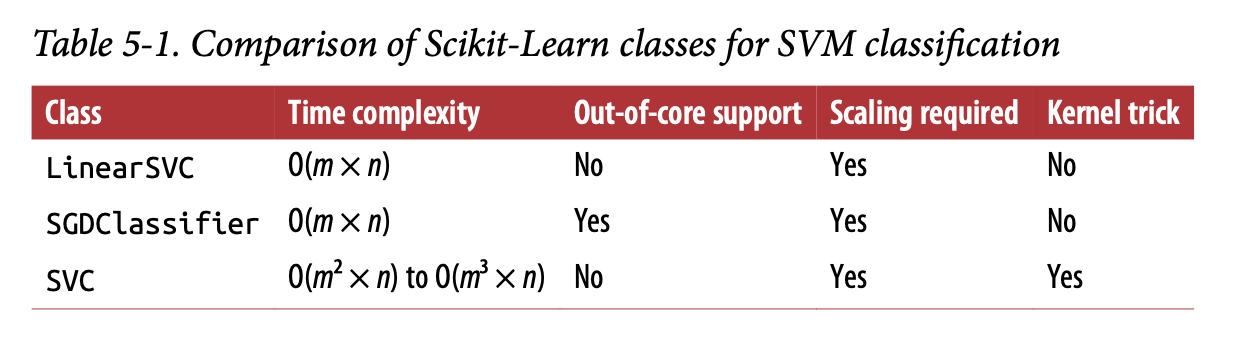

## SVM Regression
* **Instead of trying to fit the largest possible street between two classes while limiting margin violations, SVM Regression tries to fit as many instances as possible on the street while limiting margin violations**
* **The width of the street is controlled by a hyperparameter $\epsilon$**

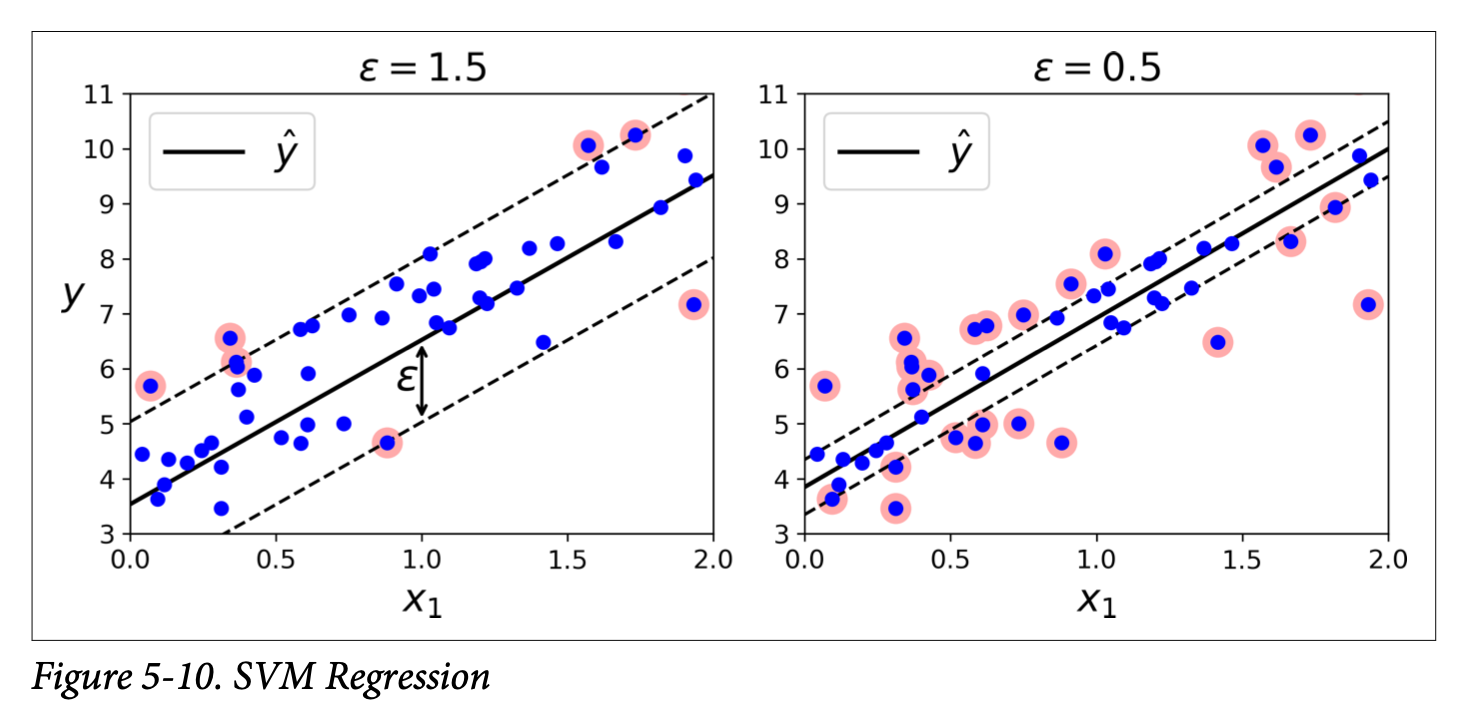

* **Adding more training instances within the margi does not affect the model's predictions; thus, the model is siad to be $\epsilon$-insensitive**

* **You can use Scikit-Learn's** LinearSVR **class to perform linear SVM regression.**

In [16]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

* **To tackle nonlinear regression tasks, you an use a Kernelized SVM model.**
* **The** LinearSVR **class scales linearly with the size of the training set, while the SVR clas gets much too slow when the training set grows large.**

In [17]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Under the Hood

### Decision Function and Predictions


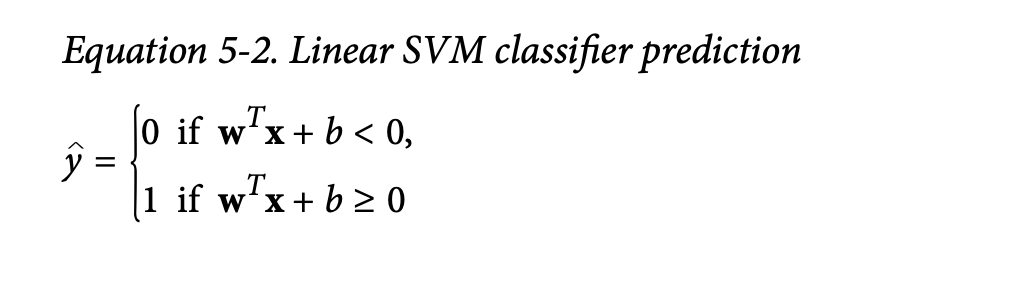

* **The linear SVM classifier model predicts the class of a new instance $\pmb{x}$ by simply computng the decision fucntion $\pmb{w}^{T} \pmb{x} + b = w_1 x_1 + \dots + w_n x_n + b$: if the result is positive, the predicted class $\hat{y}$ is the positive class(1), or else it is the negative class (0)**
* **Training a linear SVM classifier means finding the value of $\pmb{w}$ and $b$ that make this marhin as wide as possible while avoiding margin violations(hard margin) or limiting them(soft margin)**

### Training Objective
* **Consider the slope of the decision function: it is equal to the norm of the weight vector, $|| \pmb{w} ||$.**
* **The smaller the weight vector $\pmb{w}$, the larger the margin.**

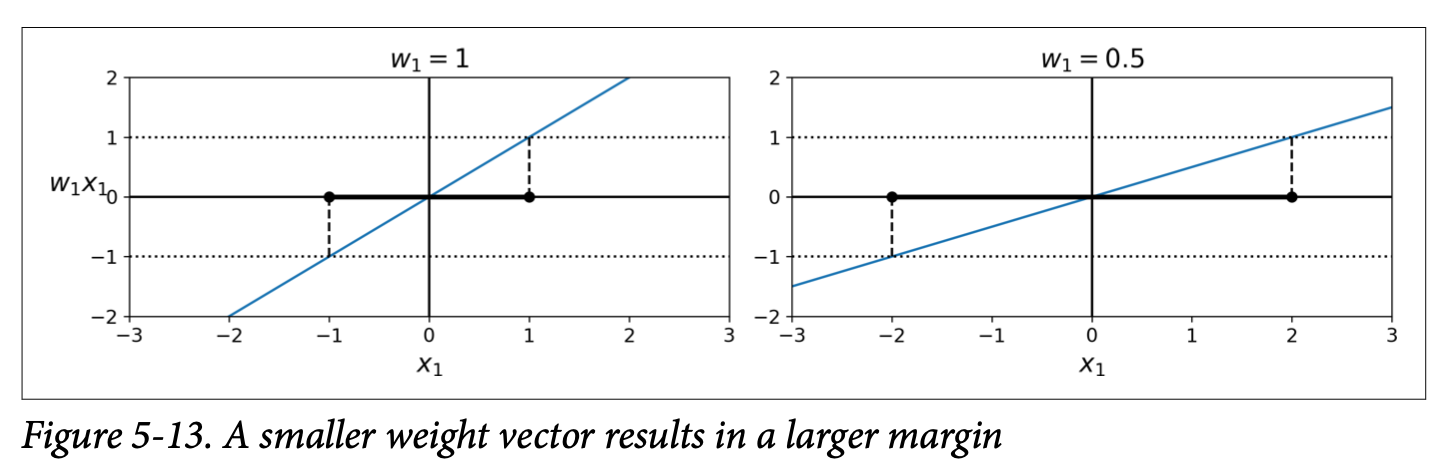

* **So we want to minimize $||\pmb{w}||$ to get a large margin.**
    * **we also want to avoid any margin violations(hard margin), then we need the decision function to be greater than 1 for all positive training instances, and lower than -1 for negative training instances.**

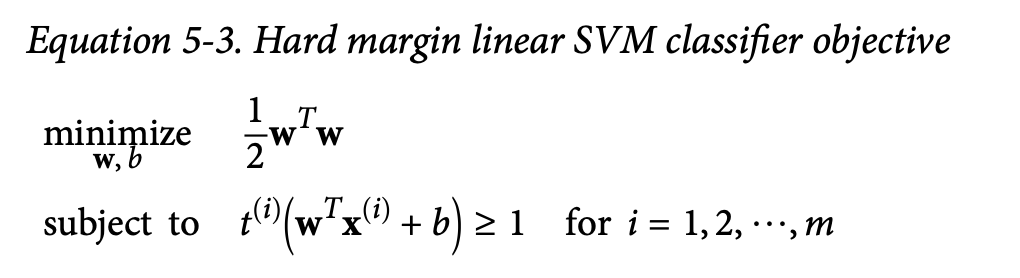

* **To get the soft margin objective, we need to introduce a *slack variable* $\gamma^{(i)} \gt 0 $  for each instance: $\gamma^{(i)}$ measures how much the $i^th$ is allowed to violate the margin.**
* **We now ave two conflicting objectives: making the slack variable as small as possible to reduce the margin vilations, and making $\frac{1}{2} \pmb{w}^{T} \pmb{w}$ as small as possible to increase the margin**
* **The C hyperparameter allows us to define the trade off between these two objectives.**

### Quadratic Programming


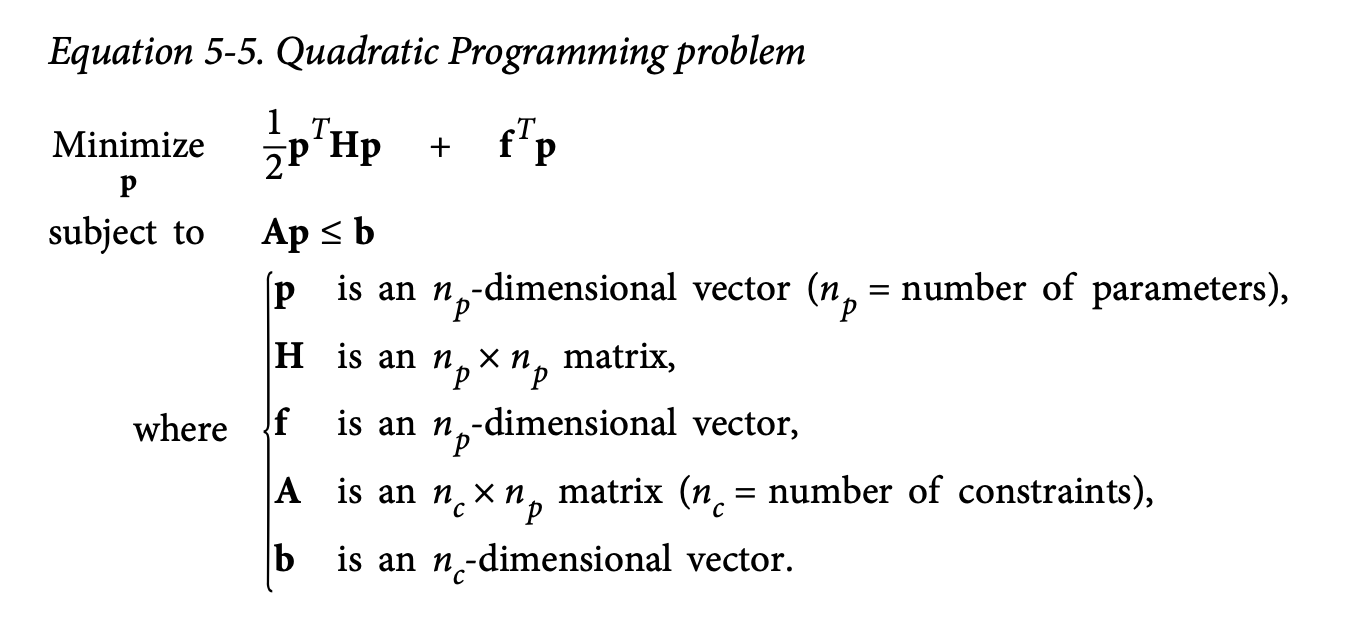

### The Dual Problem
* **Given a constrained optimization problem, known as the *primal problem*, it is possible to express a different but closely related problem, called its *dual problem.***
* **The solution to the dual problem typically gives a lower bound to the solution of the primal problem, but under some conditions it can even have the same solutions as the primal problem.**

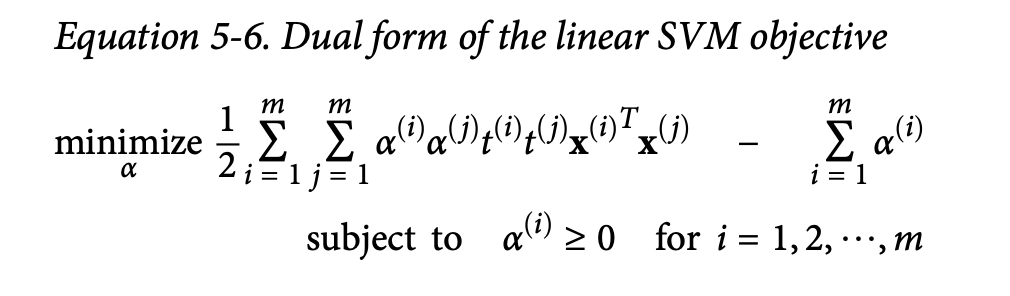

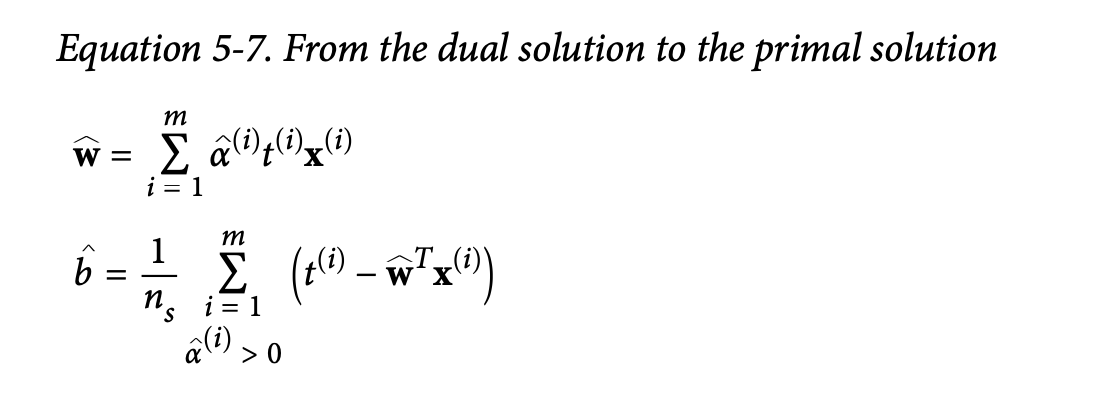

### Kernelized SVM
* **Suppose you want to apply a 2nd degree polynomial transformation to a two-dimensional training set, then train a linear SVM classifier on the transformed training set.**
* **Equation 5-8 shows the $2^{nd}$ degree polynomial mapping function $\theta$ that you want to apply**